# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**

Dataset yang digunakan berisikan data mengenai transaksi yang telah dilakukan oleh pelanggan di suatu bank yang mencakup berbagai fitur seperti jumlah uang yang ditransaksikan, lokasi, tipe transaksi, dan lainnya.


Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola serupa.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [111]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [112]:
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [114]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

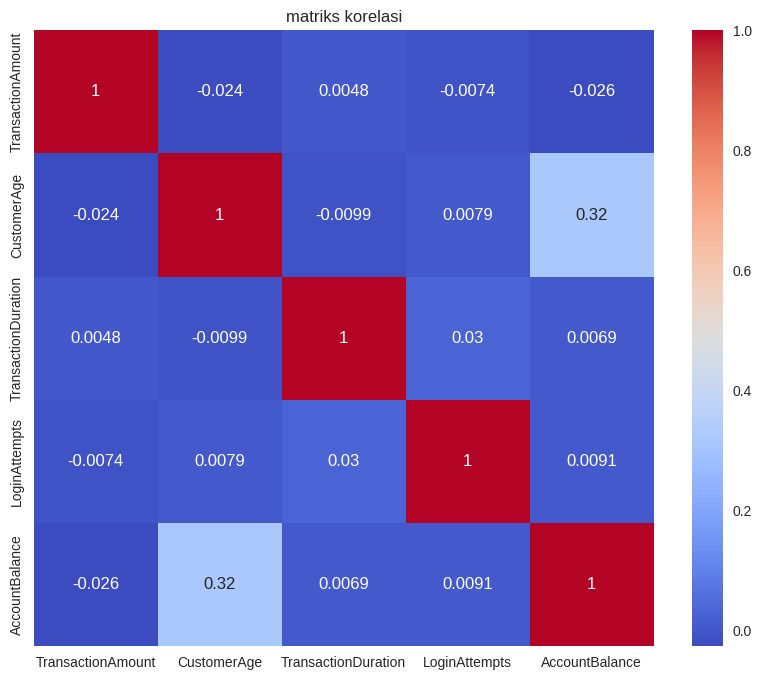

In [115]:
numerik = df.select_dtypes(include=['number'])
korelasi = numerik.corr()
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title("matriks korelasi")
plt.show()

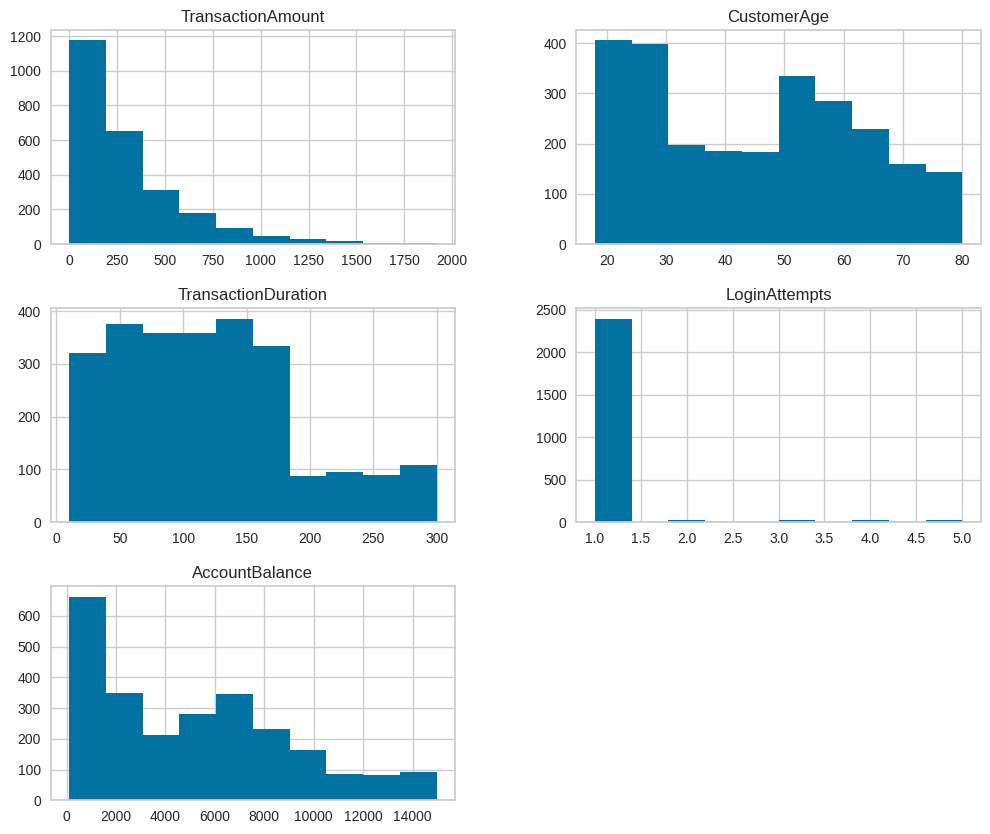

In [116]:
numerik.hist(figsize=(12,10))
plt.show()

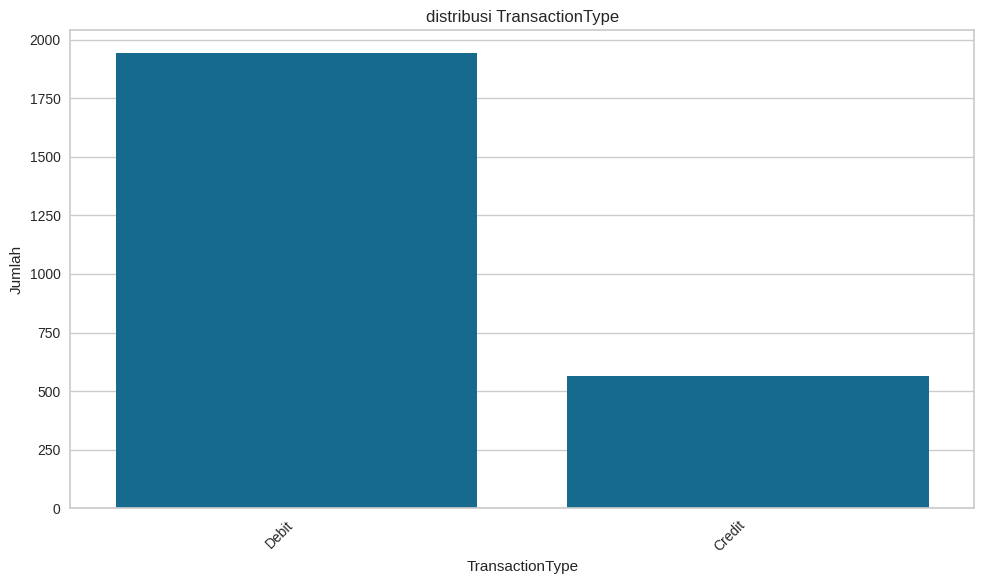

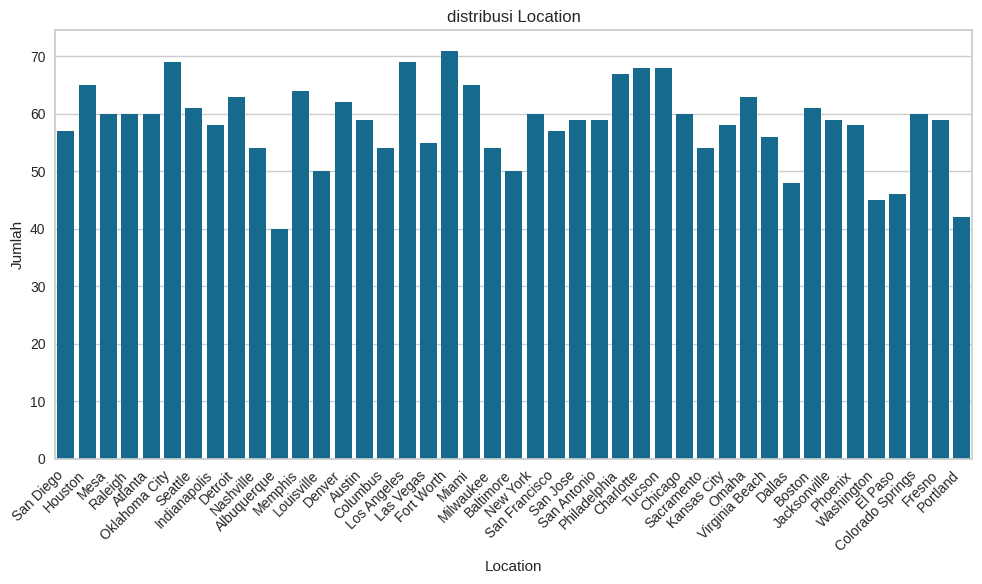

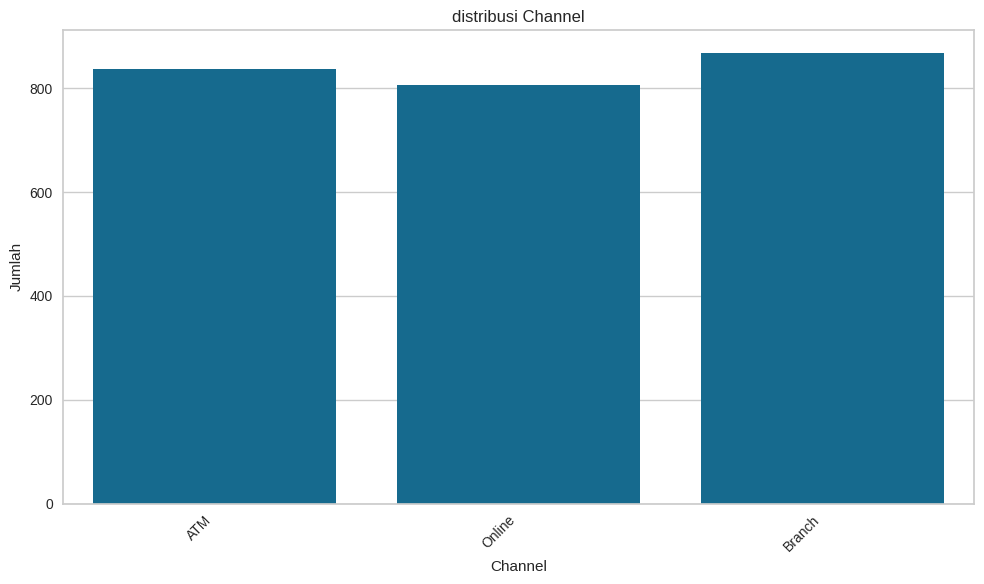

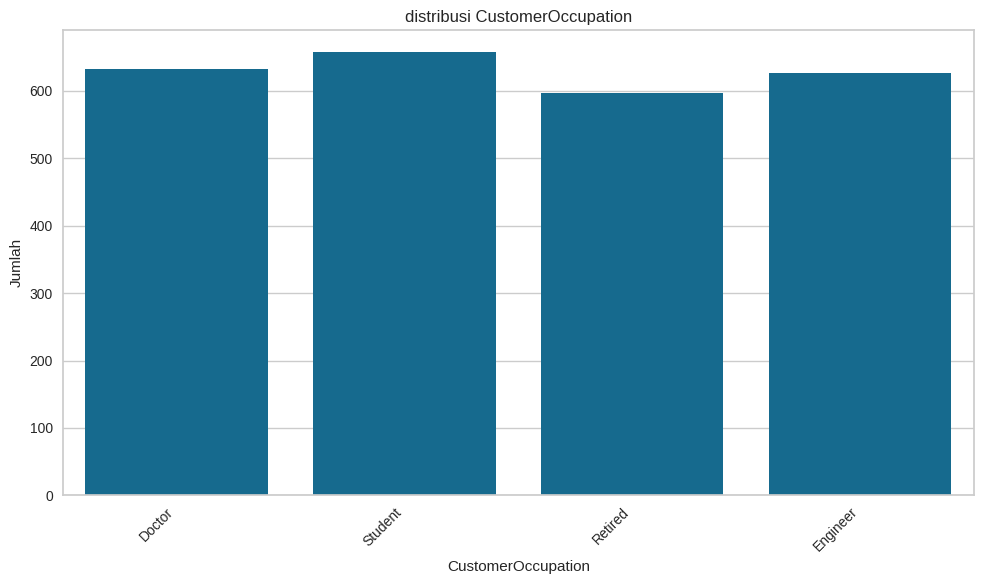

In [117]:
kategori = ['TransactionType','Location','Channel','CustomerOccupation']
for column in kategori:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x=column)
  plt.title(f'distribusi {column}')
  plt.xlabel(column)
  plt.ylabel('Jumlah')
  plt.xticks(rotation=45,ha='right')
  plt.tight_layout()
  plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

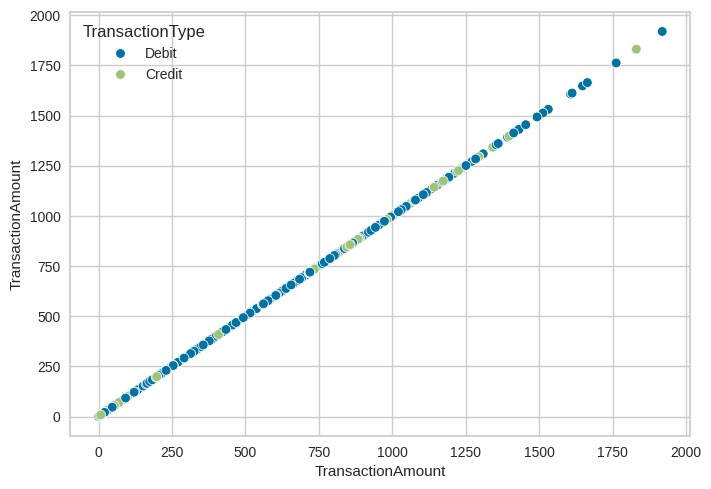

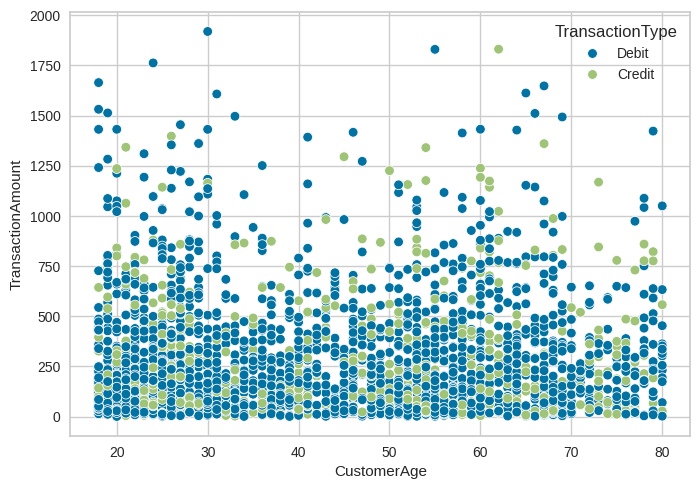

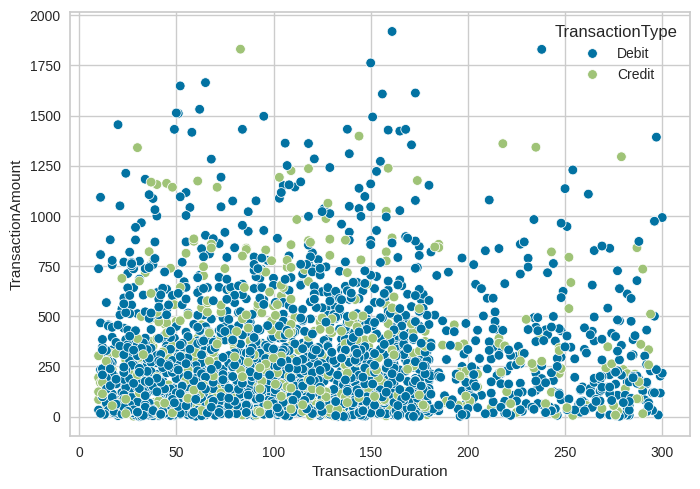

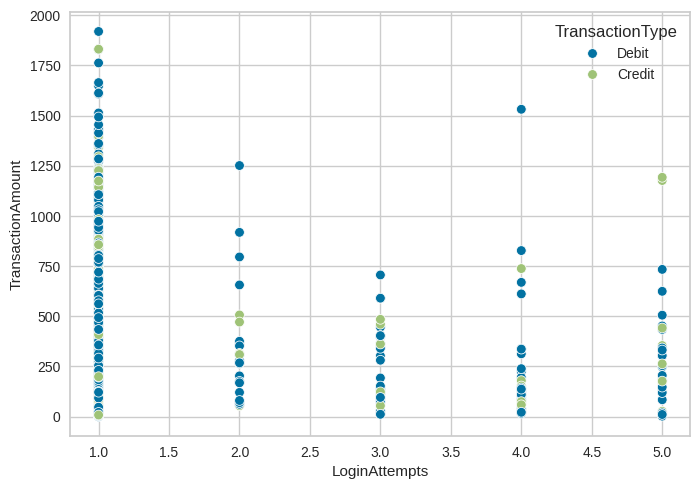

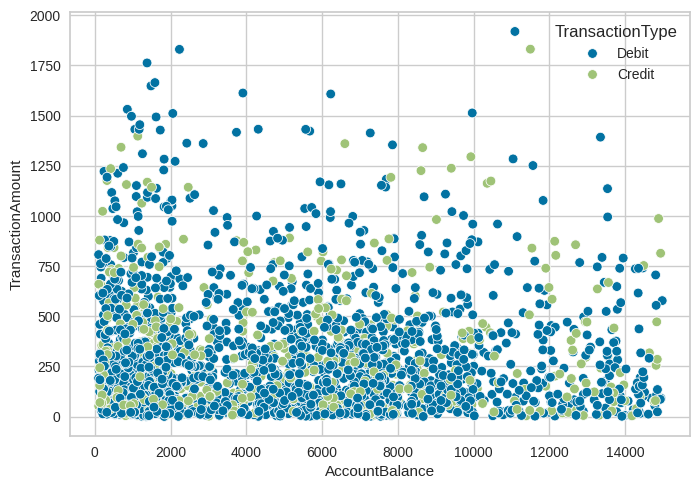

In [118]:
for i in numerik:
  sns.scatterplot(data=df,x=i,y='TransactionAmount',hue='TransactionType')
  plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [119]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [120]:
df.duplicated().sum()

np.int64(21)

In [121]:
numerik_cols = numerik.columns
colskalanumerik = [col for col in numerik_cols if col != 'LoginAttempts'] #menurut saya loginattempt tidak perlu discale
scaler = StandardScaler()
df[colskalanumerik] = scaler.fit_transform(df[colskalanumerik])

df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393            1.0   
1     1.307715             Doctor             0.307960            1.0   
2    -1.439874            Student            -0.905207            1.0   
3    -1.047361            Student            -1.347656            1.0   
4          NaN            Student             1.121495            1.0   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [122]:
dropkolom = ['TransactionID','AccountID','DeviceID','IP Address','MerchantID','TransactionDate','PreviousTransactionDate']
df = df.drop(dropkolom,axis=1)

In [123]:
label_encoders = {}

for col in kategori:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
#for col in kategori:
  #  le = LabelEncoder()
  #  df[col] = le.fit_transform(df[col])

In [124]:
df.head(10)

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2          NaN   
5          -0.703375                1        28        0    -1.495947   
6          -0.994538                0        39        0    -0.430555   
7          -0.432062                0        16        1     1.251642   
8          -0.655184                0        11        1     0.354470   
9           1.773966                1        26        0     0.578763   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0            -0.548393            1.0       -0.000315  
1                   0             0.307960            1.0        2.218381  
2                   3            -0.905207            1.0       -1.024091  
3                   3            -1.347656            1.0        0.886694  
4                   3             1.121495            1.0        0.594263  
5                   3             0.750409            1.0       -1.111505  
6                   0             0.279415            1.0        2.104915  
7                   2             2.448842            1.0       -0.594580  
8                   1            -0.477031            1.0        1.021683  
9                   0             0.008236            1.0       -1.049871

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [125]:
dfclean = df.dropna()

In [126]:
dfclean = dfclean.drop_duplicates()
df = dfclean

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2397 entries, 0 to 2524
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2397 non-null   float64
 1   TransactionType      2397 non-null   int64  
 2   Location             2397 non-null   int64  
 3   Channel              2397 non-null   int64  
 4   CustomerAge          2397 non-null   float64
 5   CustomerOccupation   2397 non-null   int64  
 6   TransactionDuration  2397 non-null   float64
 7   LoginAttempts        2397 non-null   float64
 8   AccountBalance       2397 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 187.3 KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [128]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [129]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [130]:
df.describe()

TransactionAmount  TransactionType     Location      Channel  \
count        2397.000000      2397.000000  2397.000000  2397.000000   
mean           -0.000284         0.788903    21.375887     1.013350   
std             0.997745         0.437774    12.414387     0.831248   
min            -1.017881         0.000000     0.000000     0.000000   
25%            -0.738080         1.000000    11.000000     0.000000   
50%            -0.289851         1.000000    21.000000     1.000000   
75%             0.389543         1.000000    32.000000     2.000000   
max             5.549651         2.000000    43.000000     3.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  2397.000000         2397.000000          2397.000000    2397.000000   
mean     -0.002976            1.531498             0.001043       1.120150   
std       1.000141            1.153653             1.003315       0.588353   
min      -1.495947            0.000000            -1.561745       1.000000   
25%      -0.991288            0.000000            -0.805299       1.000000   
50%       0.018031            2.000000            -0.105944       1.000000   
75%       0.803056            3.000000             0.607683       1.000000   
max       1.980594            4.000000             2.577295       5.000000   

       AccountBalance  
count     2397.000000  
mean        -0.005633  
std          1.001030  
min         -1.286100  
25%         -0.929667  
50%         -0.107728  
75%          0.653306  
max          2.531190

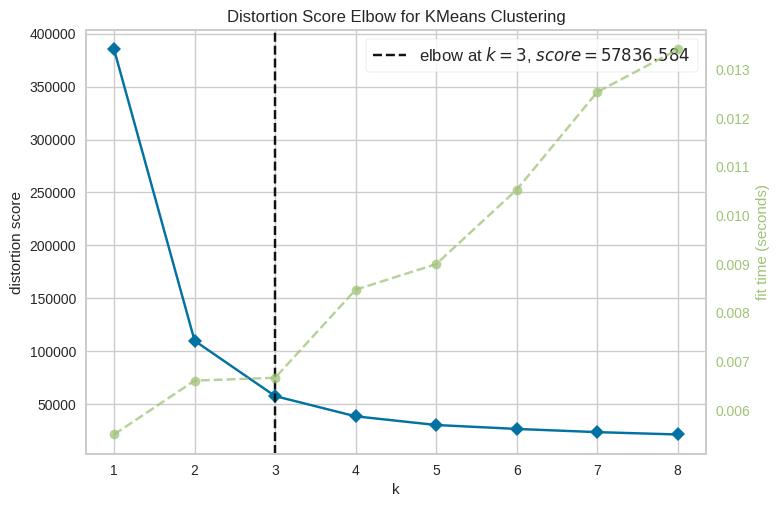

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
inertia = []
K = range(1,9)
for k in K:
  kMeansModel = KMeans(n_clusters=k, random_state=0).fit(df)
  inertia.append(kMeansModel.inertia_)

model = KMeans(random_state=0,n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(df)
visualizer.show()


In [132]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [133]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [134]:
X = df.drop('Cluster',axis=1)
labelcluster = df['Cluster']
silhouettescore = silhouette_score(X,labelcluster)
print(f"hasil silhouette score untuk {n_clusters} cluster adalah : {silhouettescore:.4f}")

hasil silhouette score untuk 3 cluster adalah : 0.4957


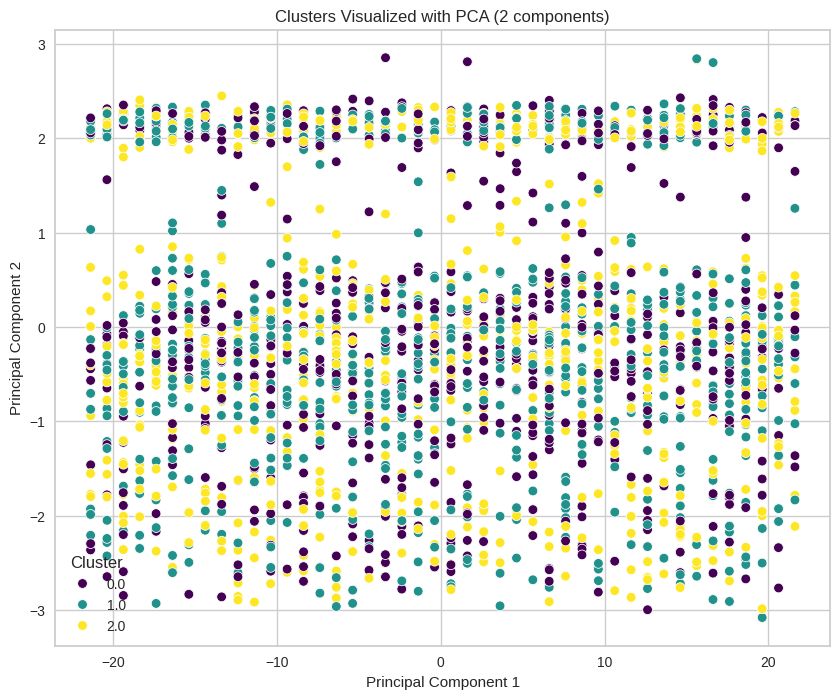

In [135]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])
pca_df['Cluster'] = labelcluster

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='Cluster', data=pca_df,palette='viridis')
plt.title('Clusters Visualized with PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [136]:
# Membangun model menggunakan PCA.

In [137]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [138]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.

persebaran = df['Cluster'].value_counts()
print("Persebaran Cluster :")
print(persebaran)

Persebaran Cluster :
Cluster
1    858
2    786
0    753
Name: count, dtype: int64


In [139]:
agg_numerik = df.groupby('Cluster')[numerik_cols].agg(['mean', 'std', 'min', 'max'])
print(agg_numerik)

        TransactionAmount                               CustomerAge            \
                     mean       std       min       max        mean       std   
Cluster                                                                         
0                0.002231  0.993086 -1.017676  5.248151    0.007159  1.033458   
1                0.022864  1.047667 -1.017881  5.549651   -0.045362  0.993062   
2               -0.027961  0.945561 -1.017231  5.012878    0.033583  0.974645   

                            TransactionDuration                                \
              min       max                mean       std       min       max   
Cluster                                                                         
0       -1.495947  1.980594           -0.001241  1.016539 -1.561745  2.577295   
1       -1.495947  1.980594           -0.021690  0.982717 -1.561745  2.563023   
2       -1.495947  1.980594            0.028047  1.013400 -1.561745  2.577295   

        LoginAttempts     

In [140]:
#melakukan inverse disini untuk interpretasi

for col in kategori:
  if col in label_encoders:
   le = label_encoders[col]
   df[col] = le.inverse_transform(df[col])

df[colskalanumerik] = scaler.inverse_transform(df[colskalanumerik])

df.head()


TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
5            Student                172.0            1.0          781.68   

   Cluster  
0        1  
1        2  
2        2  
3        1  
5        1

In [141]:
agg_numerik = df.groupby('Cluster')[numerik_cols].agg(['mean', 'std', 'min', 'max'])
print(agg_numerik)

categorical_cols = df.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    moduskategori = df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    print("\nmode fitur kategorikal")
    print(moduskategori)
else:
    print("-")

        TransactionAmount                            CustomerAge             \
                     mean         std   min      max        mean        std   
Cluster                                                                       
0              298.308300  290.151948  0.32  1831.02   44.806109  18.430494   
1              304.336573  306.099191  0.26  1919.11   43.869464  17.710079   
2              289.486908  276.266504  0.45  1762.28   45.277354  17.381648   

                    TransactionDuration                         LoginAttempts  \
          min   max                mean        std   min    max          mean   
Cluster                                                                         
0        18.0  80.0          119.335989  71.223334  10.0  300.0      1.128818   
1        18.0  80.0          117.903263  68.853615  10.0  299.0      1.095571   
2        18.0  80.0          121.388041  71.003424  10.0  300.0      1.138677   

                            AccountBal


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. Cluster 1: Pelanggan ATM
* TransactionAmount: 0.002231 (298.308300)
* CustomerAge: 0.007159 (44.806109)
* TransactionDuration: -0.001241 (119.335989)
* LoginAttempts: 1.128818
* AccountBalance: 0.002600 (5123.570212)
* Analisis: Cluster ini adalah pelanggan yang umumnya menggunakan ATM untuk melakukan transaksi dan memiliki karakteristik transaksi yang normal atau biasa.


2. Cluster 2: (Branch lokal)
* TransactionAmount: 0.022864 (304.336573)
* CustomerAge: -0.045362 (43.869464)
* TransactionDuration: -0.021690 (117.903263)
* LoginAttempts: 1.095571
* AccountBalance: -0.009463 (5076.558310)

* Analisis: Cluster ini berisi pelanggan yang lebih menggunakan branch untuk * transaksinya dengan karakteristik transaksi yang normal atau biasa rata-rata di Oklahoma city

3. Cluster 3 : (Branch engineer)
* TransactionAmount: -0.027961 (289.486908)
* CustomerAge: 0.033583 (45.277354)
* TransactionDuration: 0.028047 (121.388041)
* LoginAttempts: 1.138677
* AccountBalance: -0.009338 (5077.044211)
* Analisis: Cluster ini memiliki banyak engineers dan banyak yang menggunakan branch. di cluster ini jumlah transaksi cenderung lebih sedikit dan durasi transaksi sedikit lebih lama


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [142]:
df = df.rename(columns={'Cluster': 'Target'})
df.head()

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
5            Student                172.0            1.0          781.68   

   Target  
0       1  
1       2  
2       2  
3       1  
5       1

In [143]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [144]:
# inverse dataset ke rentang normal
# (Sudah dilakukan di bagian interpretasi cluster )

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [145]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [146]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)